In [48]:
import pandas as pd 
import numpy as np
import os
import matplotlib.pyplot as plt




In [10]:
print(os.getcwd())

c:\Users\SSAFY\Desktop\session2-team3\DA\sh


In [73]:
# 그냥 하나 실험적으로 개별 주식 시각화 + 간단 정리


df = pd.read_csv('./single_stock/5930_stock.csv')

In [74]:
df.describe()

,Unnamed: 0,code,open,high,low,close,volume,change
count,6000.000000,6000.0,6000.000000,6000.000000,6000.000000,6000.000000,6.000000e+03,5999.000000
mean,2999.500000,5930.0,30763.355667,31066.172000,30451.695167,30778.308333,5.016959e+06,0.000641
std,1732.195139,0.0,23122.250103,23313.404155,22914.578798,23093.003133,8.530903e+06,0.020065
min,0.000000,5930.0,0.000000,0.000000,0.000000,2800.000000,0.000000e+00,-0.137566
25%,1499.750000,5930.0,11475.000000,11580.000000,11360.000000,11460.000000,2.943078e+05,-0.010582
50%,2999.500000,5930.0,24760.000000,25040.000000,24470.000000,24740.000000,5.056650e+05,0.000000
75%,4499.250000,5930.0,48752.500000,49227.500000,48200.000000,48800.000000,9.113981e+06,0.011242
max,5999.000000,5930.0,90300.000000,96800.000000,89500.000000,91000.000000,9.030618e+07,0.150000


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  6000 non-null   int64  
 1   code        6000 non-null   int64  
 2   date        6000 non-null   object 
 3   open        6000 non-null   float64
 4   high        6000 non-null   float64
 5   low         6000 non-null   float64
 6   close       6000 non-null   float64
 7   volume      6000 non-null   float64
 8   change      5999 non-null   float64
dtypes: float64(6), int64(2), object(1)
memory usage: 422.0+ KB


In [76]:
# 'date' 컬럼을 datetime 형식으로 변환 (이미 datetime이지만 확인)
df['date'] = pd.to_datetime(df['date'])

# 'date' 컬럼을 인덱스로 설정
df.set_index('date', inplace=True)

# 2001년 1월 1일 이후의 데이터만 선택
df= df[df.index >= '2001-01-01']

In [77]:
df.drop('Unnamed: 0', inplace=True, axis=1)
df

,code,open,high,low,close,volume,change
date,,,,,,,
2001-01-02,5930,3160.0,3380.0,3140.0,3350.0,789127.0,0.060127
2001-01-03,5930,3229.0,3420.0,3220.0,3370.0,757143.0,0.005970
2001-01-04,5930,3790.0,3870.0,3660.0,3780.0,2398248.0,0.121662
2001-01-05,5930,3760.0,3920.0,3700.0,3900.0,1562744.0,0.031746
2001-01-08,5930,3820.0,3910.0,3780.0,3880.0,845911.0,-0.005128
...,...,...,...,...,...,...,...
2025-04-03,5930,56900.0,57800.0,56900.0,57600.0,19508076.0,-0.020408
2025-04-04,5930,56200.0,58200.0,55700.0,56100.0,23527139.0,-0.026042
2025-04-07,5930,53300.0,54100.0,53100.0,53200.0,31998883.0,-0.051693


In [78]:
### 외 않뒘?

# # 'date' 컬럼을 datetime 형식으로 변환
# # df['date'] = pd.to_datetime(df['date'])
# # 'date' 컬럼을 인덱스로 설정
# # df.set_index('date', inplace=True)

# # 기간으로 나누기 
# # 일주일 단위
# df['week_avg'] = df['close'].resample('W').mean()  # 주간 평균
# # 한 달 단위 
# df['monthly_avg'] = df['close'].resample('M').mean()  # 월간 평균
# # 분기 단위 
# df['quarter_avg'] = df['close'].resample('Q').mean()  # 분기 평균
# # 반기 단위 
# df['semiannual_avg'] = df['close'].resample('2Q').mean()
# # 연간 단위 
# df['annual_avg'] = df['close'].resample('A').mean()  # 연 평균




# df['week_avg'] = df['week_avg'].fillna(method='ffill')  # 이전 값으로 채우기
# df['week_avg'] = df['week_avg'].fillna(method='bfill')  # 이후 값으로 채우기
# # df['week_avg'] = df['week_avg'].fillna(0)  # 0으로 채우기


In [79]:
# 이동평균선

# 5일 이동 평균
df['week_moving_avg'] = df['close'].rolling(window=5).mean()

# 20일 이동 평균 (한 달 기준)
df['month_moving_avg'] = df['close'].rolling(window=20).mean()

# 60일 이동 평균 (한 분기 기준)
df['quarter_moving_avg'] = df['close'].rolling(window=60).mean()

# 120일 이동 평균 (반기 기준)
df['half_annual_moving_avg'] = df['close'].rolling(window=120).mean()


# 얘는 따로 빼서 구해야 할 듯
# df['year_moving_avg'] = df['close'].rolling(window=252).mean()

In [ ]:
# 로그 수익률 

df['log_change'] = np.log(df['close'] / df['close'].shift(1))
df['weekly_return_sum'] = df['log_change'].rolling(window=5).sum() *100
df['monthly_return_sum'] = df['log_change'].rolling(window=20).sum() *100
df['quarterly_return_sum'] = df['log_change'].rolling(window=60).sum() *100

In [83]:
df

,code,open,high,low,close,volume,change,week_moving_avg,month_moving_avg,quarter_moving_avg,half_annual_moving_avg,log_change,weekly_return_sum,monthly_return_sum,quarterly_return_sum
date,,,,,,,,,,,,,,,
2001-01-02,5930,3160.0,3380.0,3140.0,3350.0,789127.0,0.060127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-03,5930,3229.0,3420.0,3220.0,3370.0,757143.0,0.005970,NaN,NaN,NaN,NaN,0.005952,NaN,NaN,NaN
2001-01-04,5930,3790.0,3870.0,3660.0,3780.0,2398248.0,0.121662,NaN,NaN,NaN,NaN,0.114811,NaN,NaN,NaN
2001-01-05,5930,3760.0,3920.0,3700.0,3900.0,1562744.0,0.031746,NaN,NaN,NaN,NaN,0.031253,NaN,NaN,NaN
2001-01-08,5930,3820.0,3910.0,3780.0,3880.0,845911.0,-0.005128,3656.0,NaN,NaN,NaN,-0.005141,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-03,5930,56900.0,57800.0,56900.0,57600.0,19508076.0,-0.020408,58640.0,57880.0,55980.000000,56068.333333,-0.020619,-7.038080,5.899834,7.571182
2025-04-04,5930,56200.0,58200.0,55700.0,56100.0,23527139.0,-0.026042,57820.0,58000.0,56008.333333,56027.500000,-0.026387,-7.053654,4.372281,3.077166
2025-04-07,5930,53300.0,54100.0,53100.0,53200.0,31998883.0,-0.051693,56900.0,57975.0,55963.333333,55968.333333,-0.053077,-8.293038,-0.935461,-4.950598


In [ ]:
df = df.reset_index()


,date,code,open,high,low,close,volume,change,week_moving_avg,month_moving_avg,quarter_moving_avg,half_annual_moving_avg
0,2001-01-02,5930,3160.0,3380.0,3140.0,3350.0,789127.0,0.060127,NaN,NaN,NaN,NaN
1,2001-01-03,5930,3229.0,3420.0,3220.0,3370.0,757143.0,0.005970,NaN,NaN,NaN,NaN
2,2001-01-04,5930,3790.0,3870.0,3660.0,3780.0,2398248.0,0.121662,NaN,NaN,NaN,NaN
3,2001-01-05,5930,3760.0,3920.0,3700.0,3900.0,1562744.0,0.031746,NaN,NaN,NaN,NaN
4,2001-01-08,5930,3820.0,3910.0,3780.0,3880.0,845911.0,-0.005128,3656.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
5986,2025-04-03,5930,56900.0,57800.0,56900.0,57600.0,19508076.0,-0.020408,58640.0,57880.0,55980.000000,56068.333333
5987,2025-04-04,5930,56200.0,58200.0,55700.0,56100.0,23527139.0,-0.026042,57820.0,58000.0,56008.333333,56027.500000
5988,2025-04-07,5930,53300.0,54100.0,53100.0,53200.0,31998883.0,-0.051693,56900.0,57975.0,55963.333333,55968.333333
5989,2025-04-08,5930,55000.0,55300.0,53300.0,53500.0,25532845.0,0.005639,55840.0,57970.0,55931.666667,55923.333333


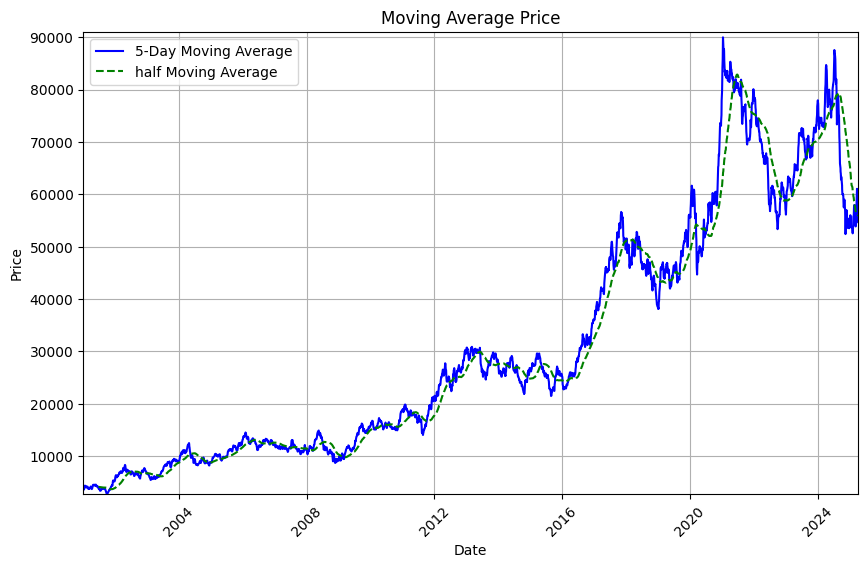

In [59]:
# 시각화: X축에 date, Y축에 5일 이동 평균 값
plt.figure(figsize=(10,6))
plt.plot(df.index, df['week_moving_avg'], label='5-Day Moving Average', color='blue')
# plt.plot(df.index, df['month_moving_avg'], label='Monthly Moving Average', color='green', linestyle='--')
# plt.plot(df.index, df['quarter_moving_avg'], label='quarter Moving Average', color='green', linestyle='--')
plt.plot(df.index, df['half_annual_moving_avg'], label='half Moving Average', color='green', linestyle='--')

# plt.plot(df.index, df['close'], label='Close Price', color='red', linestyle='--')
plt.title('Moving Average Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

# 축의 범위 조정 (X축, Y축)
plt.xlim(df.index.min(), df.index.max())  # X축 범위 설정
plt.ylim(df['close'].min(), df['close'].max())  # Y축 범위 설정

plt.show()

In [85]:
df.reset_index()

,date,code,open,high,low,close,volume,change,week_moving_avg,month_moving_avg,quarter_moving_avg,half_annual_moving_avg,log_change,weekly_return_sum,monthly_return_sum,quarterly_return_sum
0,2001-01-02,5930,3160.0,3380.0,3140.0,3350.0,789127.0,0.060127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2001-01-03,5930,3229.0,3420.0,3220.0,3370.0,757143.0,0.005970,NaN,NaN,NaN,NaN,0.005952,NaN,NaN,NaN
2,2001-01-04,5930,3790.0,3870.0,3660.0,3780.0,2398248.0,0.121662,NaN,NaN,NaN,NaN,0.114811,NaN,NaN,NaN
3,2001-01-05,5930,3760.0,3920.0,3700.0,3900.0,1562744.0,0.031746,NaN,NaN,NaN,NaN,0.031253,NaN,NaN,NaN
4,2001-01-08,5930,3820.0,3910.0,3780.0,3880.0,845911.0,-0.005128,3656.0,NaN,NaN,NaN,-0.005141,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5986,2025-04-03,5930,56900.0,57800.0,56900.0,57600.0,19508076.0,-0.020408,58640.0,57880.0,55980.000000,56068.333333,-0.020619,-7.038080,5.899834,7.571182
5987,2025-04-04,5930,56200.0,58200.0,55700.0,56100.0,23527139.0,-0.026042,57820.0,58000.0,56008.333333,56027.500000,-0.026387,-7.053654,4.372281,3.077166
5988,2025-04-07,5930,53300.0,54100.0,53100.0,53200.0,31998883.0,-0.051693,56900.0,57975.0,55963.333333,55968.333333,-0.053077,-8.293038,-0.935461,-4.950598
5989,2025-04-08,5930,55000.0,55300.0,53300.0,53500.0,25532845.0,0.005639,55840.0,57970.0,55931.666667,55923.333333,0.005623,-9.446020,-0.186741,-3.489794


In [ ]:
df.columns

Index(['code', 'open', 'high', 'low', 'close', 'volume', 'change',
       'week_moving_avg', 'month_moving_avg', 'quarter_moving_avg',
       'half_annual_moving_avg', 'log_change', 'weekly_return_sum',
       'monthly_return_sum', 'quarterly_return_sum'],
      dtype='object')